## データサイエンス
### プレ講座　第一回目
- jupyter notebookに慣れる
- 簡単に可視化してみる

#### まず、上記タブのKearnelから「Restart Kernel and Clear All Outputs...」を選択する
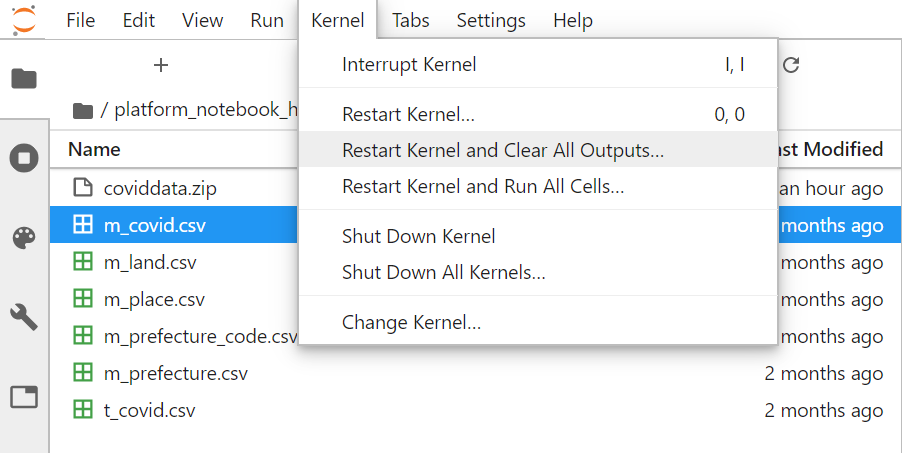

### 四則演算

In [1]:
#　shiftキーを押しながらEnterを押す
12 * 12 + 2 / 2

145.0

### 前準備（おまじない）

In [2]:
!pwd

/root/notebook/platform_notebook_handson/day1


In [3]:
#フォントが文字化けするので、日本語を追加
!wget https://ipafont.ipa.go.jp/IPAfont/IPAfont00303.zip

--2020-06-04 03:21:10--  https://ipafont.ipa.go.jp/IPAfont/IPAfont00303.zip
Resolving ipafont.ipa.go.jp (ipafont.ipa.go.jp)... 192.218.88.244
Connecting to ipafont.ipa.go.jp (ipafont.ipa.go.jp)|192.218.88.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20088137 (19M) [application/zip]
Saving to: ‘IPAfont00303.zip’

IPAfont00303.zip    100%[===================>]  19.16M  8.84MB/s    in 2.2s    

2020-06-04 03:21:12 (8.84 MB/s) - ‘IPAfont00303.zip’ saved [20088137/20088137]



In [4]:
!unzip IPAfont00303.zip

Archive:  IPAfont00303.zip
  inflating: IPAfont00303/IPA_Font_License_Agreement_v1.0.txt  
  inflating: IPAfont00303/ipag.ttf   
  inflating: IPAfont00303/ipagp.ttf  
  inflating: IPAfont00303/ipam.ttf   
  inflating: IPAfont00303/ipamp.ttf  
  inflating: IPAfont00303/Readme_IPAfont00303.txt  


In [41]:
!rm -f ~/.matplotlib/fontList.py3k.cache

In [42]:
!rm -f /root/.cache/matplotlib/fontlist-v310.json

In [7]:
#参考: https://qiita.com/maroKanatani/items/3b080c639395bba7795a
!cp ./IPAfont00303/*.ttf /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf
#!cp ./IPAfont00303/*.ttf /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

In [1]:
# ここで Restart Kernaelを実施する

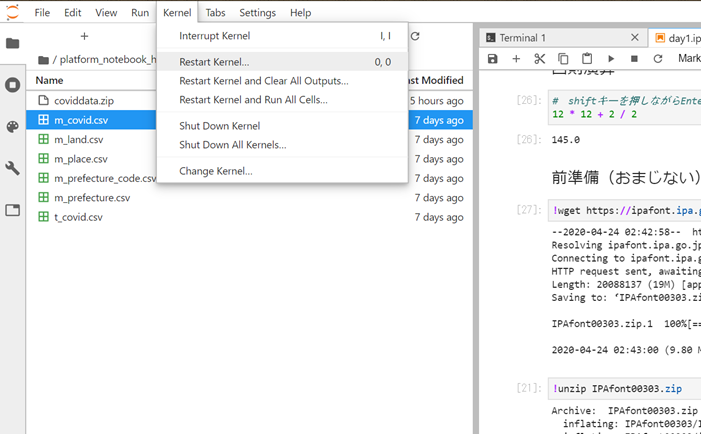

### ヒストグラムの表示

In [1]:
# importとして各ライブラリを使う合図（このセル以降はずっと使える）
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams["figure.figsize"] = [15, 9]
plt.rcParams['font.size'] = 20 #フォントサイズを設定 default : 12
plt.rcParams['xtick.labelsize'] = 15 # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 15

#random.normalは正規分布上で乱数を生成する関数（平均, 標準偏差, サイズ）
d = np.random.normal(50,10,100)
e = np.random.normal(50,20,100)
df = pd.DataFrame({"data1":d,"data2":e})

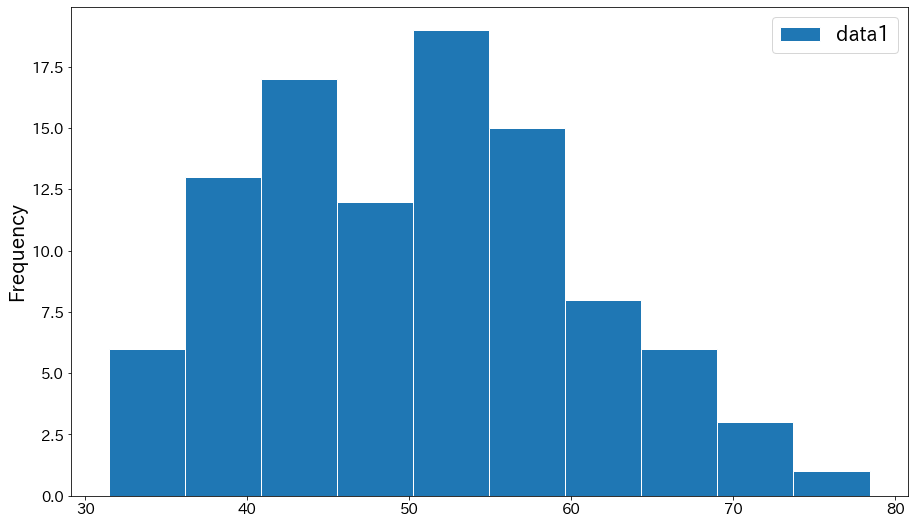

In [2]:
df.plot(kind="hist",ec="white",y="data1")
plt.show()

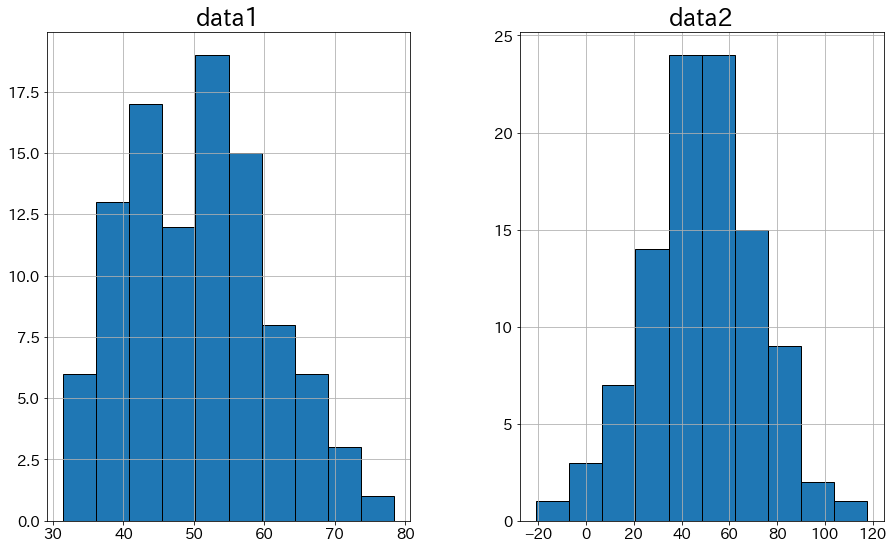

In [3]:
df.hist(ec="black")
plt.show()

- kindの種類
    ```
    'line': 折れ線グラフ（line plot）
    'bar': 垂直棒グラフ（vertical bar plot）
    'barh': 水平棒グラフ（horizontal bar plot）
    'box': 箱ひげ図（boxplot）
    'hist' : ヒストグラム（histogram）
    'kde', 'density': カーネル密度推定（Kernel Density Estimation plot）
    'area': 面グラフ（area plot）
    'scatter': 散布図（scatter plot）
    'hexbin': hexbin plot
    'pie': 円グラフ（pie plot
    ```   
- alphaは透過の割合(0 < alpha <= 1.0)

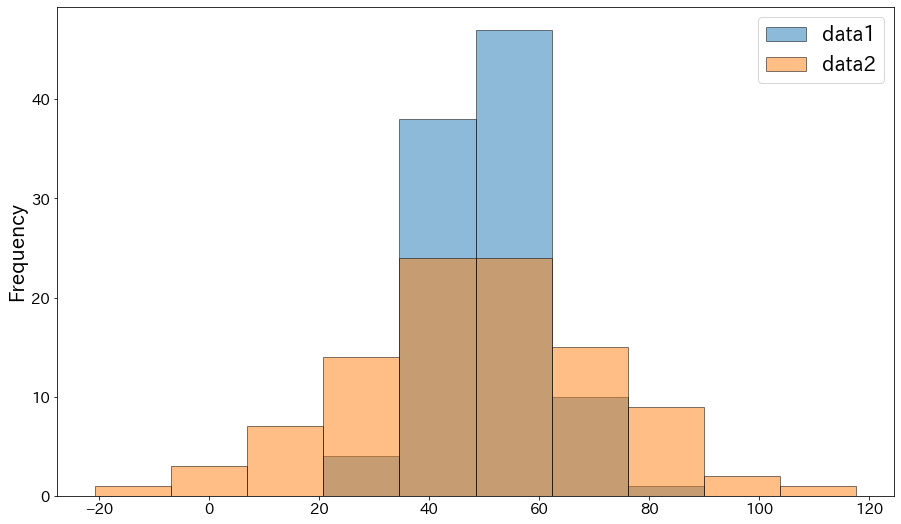

In [5]:
df.plot(kind="hist",alpha=0.5,ec="black")
plt.rcParams['font.family'] = 'IPAPGothic'
plt.show()

## 本編 (Covid-19のデータを使ってみる)
- データはこちらを利用
    - https://drive.google.com/drive/folders/1EcVW5JQKMB6zoyfHm8_zLVj---t_hccF
- signate
    - https://signate.jp/

In [6]:
import os

#カレントディレクトリの取得
home = os.path.join(os.path.dirname(os.path.abspath("__file__")),"..")
datapath = os.path.join(home,"data")

In [7]:
datapath

'/root/notebook/platform_notebook_handson/day1/../data'

In [8]:
!unzip {datapath}/coviddata.zip -d {datapath}

Archive:  /root/notebook/platform_notebook_handson/day1/../data/coviddata.zip
replace /root/notebook/platform_notebook_handson/day1/../data/m_covid.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


### データをDataFrameに読み込む前に生のデータを確認してみよう
- タブよりファイルダブルクリックして開いてみる

In [9]:
# データの読み込み(処理できる形でLoadする)
import pandas as pd
m_covid = pd.read_csv(os.path.join(datapath,'m_covid.csv'), sep=',')

In [10]:
#データの中身の表示(最初の5行目まで)
m_covid.head()

,ID,厚労省コード,都道府県症例番号,発症日,確定日,公表日,全国地方公共団体コード,受診都道府県,管理市区町村,居住都道府県,...,濃厚接触場所,海外渡航歴ﾌﾗｸﾞ,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,情報源1,情報源2,備考,Unnamed: 28,Unnamed: 29,都道府県コード,都道府県症例番号.1
0,1,NaN,1-1,2020/1/26,NaN,2020/1/28,NaN,神奈川県,NaN,NaN,...,NaN,1,0.0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,1,1
1,2,NaN,1-2,2020/1/31,2020/2/14,2020/2/14,NaN,北海道,NaN,北海道,...,NaN,0,0.0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,1,2
2,3,63,1-3,2020/2/8,2020/2/18,2020/2/19,NaN,北海道,NaN,北海道,...,NaN,0,0.0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,1,3
3,4,64,1-4,2020/2/3,2020/2/19,2020/2/19,NaN,北海道,NaN,北海道,...,NaN,0,0.0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,http://www.pref.hokkaido.lg.jp/hf/kth/kak/sing...,NaN,NaN,NaN,1,4
4,5,72,1-5,2020/2/15,2020/2/19,2020/2/20,NaN,北海道,NaN,北海道,...,NaN,0,0.0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,1,5


In [11]:
# 例えば、「発症日」列のデータだけ抽出してみる
m_covid["発症日"]

0       2020/1/26
1       2020/1/31
2        2020/2/8
3        2020/2/3
4       2020/2/15
          ...    
9059          NaN
9060          NaN
9061          NaN
9062          NaN
9063          NaN
Name: 発症日, Length: 9064, dtype: object

In [12]:
# 例えば、先頭から20行目以降25行目までを表示してみる
m_covid[20:25]

,ID,厚労省コード,都道府県症例番号,発症日,確定日,公表日,全国地方公共団体コード,受診都道府県,管理市区町村,居住都道府県,...,濃厚接触場所,海外渡航歴ﾌﾗｸﾞ,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,情報源1,情報源2,備考,Unnamed: 28,Unnamed: 29,都道府県コード,都道府県症例番号.1
20,21,120,1-21,2020/2/18,2020/2/23,2020/2/23,NaN,北海道,NaN,北海道,...,NaN,0,0.0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/sing...,https://www.mhlw.go.jp/content/10906000/000599...,NaN,NaN,NaN,1,21
21,22,121,1-22,2020/2/18,2020/2/23,2020/2/23,NaN,北海道,NaN,北海道,...,NaN,0,0.0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/sing...,http://www.pref.hokkaido.lg.jp/hf/kth/kak/sing...,NaN,NaN,NaN,1,22
22,23,122,1-23,2020/2/18,2020/2/23,2020/2/23,NaN,北海道,NaN,北海道,...,NaN,0,0.0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/sing...,https://www.mhlw.go.jp/content/10906000/000599...,NaN,NaN,NaN,1,23
23,24,123,1-24,2020/2/13,2020/2/23,2020/2/23,NaN,北海道,NaN,北海道,...,NaN,0,0.0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/sing...,https://www.mhlw.go.jp/content/10906000/000599...,NaN,NaN,NaN,1,24
24,25,124,1-25,NaN,2020/2/23,2020/2/23,NaN,北海道,NaN,北海道,...,NaN,0,0.0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/sing...,https://www.mhlw.go.jp/content/10906000/000599...,NaN,NaN,NaN,1,25


In [13]:
# 他のデータも読み込み
m_land = pd.read_csv(os.path.join(datapath,'m_land.csv'), sep=',')
m_place = pd.read_csv(os.path.join(datapath,'m_place.csv'), sep=',')
m_prefecture = pd.read_csv(os.path.join(datapath,'m_prefecture.csv'), sep=',')
m_prefecture_code = pd.read_csv(os.path.join(datapath,'m_prefecture_code.csv'), sep=',')
t_covid = pd.read_csv(os.path.join(datapath,'t_covid.csv'), sep=',')

In [14]:
# 以下同様に表示してみる
m_land.head()

,居住地,緯度（世界測地系）,経度（世界測地系）,情報源
0,アイルランド,NaN,NaN,NaN
1,イギリス,NaN,NaN,NaN
2,いすみ市,35.254075,140.385234,https://www.google.com/maps/place/%E3%81%84%E3...
3,いわき市,37.050552,140.888008,https://www.google.com/maps/place/%E3%81%84%E3...
4,インドネシア,NaN,NaN,NaN


In [15]:
m_place.head()

,接触場所,カテゴリ,緯度（世界測地系）,経度（世界測地系）,住所,情報源
0,ＪＡとりで総合医療センター,その他,35.911038,140.068802,NaN,https://www.google.com/maps/place/JA%E3%81%A8%...
1,LIVE HOUSE Rumio,イベント関連店,34.698794,135.503672,大阪府大阪市北区西天満６丁目２−１４,https://rumio.jp/;https://www.google.com/maps/...
2,Soap opera classics-Umeda,イベント関連店,34.697617,135.503047,大阪府大阪市北区西天満４丁目４−１８,http://soarsmusic-soc.jp/;https://www.google.c...
3,あいくらす香椎参道,介護施設,33.654804,130.444691,NaN,https://www.google.com/maps/place/%E3%81%82%E3...
4,イオンスポーツクラブ 3FIT 熱田千年店,スポーツクラブ,35.118666,136.899654,NaN,https://www.google.com/maps/place/%E3%82%A4%E3...


In [16]:
m_prefecture.head()

,都道府県コード,都道府県,緯度（世界測地系）,経度（世界測地系）,人口,面積,人口密度,病床数
0,1,北海道,43.06417,141.34694,"5,248,552","78,421",67,94
1,2,青森県,40.82444,140.74000,"1,246,138","9,646",129,29
2,3,岩手県,39.70361,141.15250,"1,226,430","15,275",80,38
3,4,宮城県,38.26889,140.87194,"2,303,160","7,282",316,29
4,5,秋田県,39.71861,140.10250,"965,968","11,638",83,32


In [17]:
m_prefecture_code.head()

,団体コード,都道府県名,市区町村名
0,10006,北海道,NaN
1,11002,北海道,札幌市
2,12025,北海道,函館市
3,12033,北海道,小樽市
4,12041,北海道,旭川市


In [18]:
t_covid.head()

,都道府県症例番号,日付,カテゴリ：種別,属性,備考,Unnamed: 5,Unnamed: 6,都道府県症例番号.1,Unnamed: 8
0,1-1,2020/01/21,移動:入国・帰国,東京都,中国から来日,NaN,NaN,1,1.0
1,1-1,2020/01/21,滞在:宿泊地,知人宅,NaN,NaN,NaN,1,1.0
2,1-1,2020/01/22,移動:観光,北海道,NaN,NaN,NaN,1,1.0
3,1-1,2020/01/26,症状:咳,NaN,NaN,NaN,NaN,1,1.0
4,1-1,2020/01/26,症状:発熱,NaN,NaN,NaN,NaN,1,1.0


In [19]:
# おさらい
#　すべてのファイルの行数を拾ってみる (listに格納 -> for文で出力)

# list型への格納
coviddata_list = [m_covid, m_land, m_place, m_prefecture, m_prefecture_code, t_covid]

# for文で掃き出し
for data in coviddata_list:
    print(len(data))

9064
351
61
47
1788
5022


In [20]:
# おさらい
#　すべてのファイルの行数を拾ってみる (dic型で格納 -> for文で出力)
coviddata_dic = {}
coviddata_dic["m_covid"] = m_covid
coviddata_dic["m_land"] = m_land
coviddata_dic["m_place"] = m_place
coviddata_dic["m_prefecture"] = m_prefecture
coviddata_dic["m_prefecture_code"] = m_prefecture_code
coviddata_dic["t_covid"] = t_covid

# for文で掃き出し
for key, value in coviddata_dic.items():
    # 書き方 1
    print(key + "の件数は" + str(len(value)))

    # 書き方 2
    print("{}の件数は{}".format(key, len(value)))
    
    # 書き方 3 (python 3.6以降）
    print(f"{key}の件数は{len(value)}")

m_covidの件数は9064
m_covidの件数は9064
m_covidの件数は9064
m_landの件数は351
m_landの件数は351
m_landの件数は351
m_placeの件数は61
m_placeの件数は61
m_placeの件数は61
m_prefectureの件数は47
m_prefectureの件数は47
m_prefectureの件数は47
m_prefecture_codeの件数は1788
m_prefecture_codeの件数は1788
m_prefecture_codeの件数は1788
t_covidの件数は5022
t_covidの件数は5022
t_covidの件数は5022


In [21]:
# (option) pandasは有効なライブラリがたくさんある
# dataframeで持つ情報を出力させる
m_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9064 entries, 0 to 9063
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     9064 non-null   int64  
 1   厚労省コード                 3217 non-null   object 
 2   都道府県症例番号               9064 non-null   object 
 3   発症日                    3427 non-null   object 
 4   確定日                    5351 non-null   object 
 5   公表日                    6691 non-null   object 
 6   全国地方公共団体コード            249 non-null    float64
 7   受診都道府県                 9057 non-null   object 
 8   管理市区町村                 1033 non-null   object 
 9   居住都道府県                 6965 non-null   object 
 10  居住市区町村                 5695 non-null   object 
 11  年代                     7678 non-null   object 
 12  性別                     7685 non-null   object 
 13  職業                     3128 non-null   object 
 14  医療従事者ﾌﾗｸﾞ              2165 non-null   object 
 15  ステータ

### 都道府県別に患者数を見る

In [22]:
# dataframeで対象のcolumnのみを表示させる場合
m_covid['都道府県コード']

0        1
1        1
2        1
3        1
4        1
        ..
9059    50
9060    51
9061    51
9062    51
9063    51
Name: 都道府県コード, Length: 9064, dtype: int64

In [23]:
# 各都道府県コード別に件数を数える
m_covid['都道府県コード'].value_counts()

13    2783
27     970
14     661
11     545
12     525
28     437
40     435
23     351
1      331
26     217
17     146
21     115
34     114
8      112
10     112
18      98
47      95
4       74
16      65
39      62
25      54
6       53
29      46
20      45
15      44
7       44
44      43
9       42
19      42
49      41
22      41
30      40
38      38
43      31
48      30
2       22
35      22
24      22
37      19
45      16
42      15
41      15
33      14
32      12
5       12
46       4
51       4
36       3
50       1
31       1
Name: 都道府県コード, dtype: int64

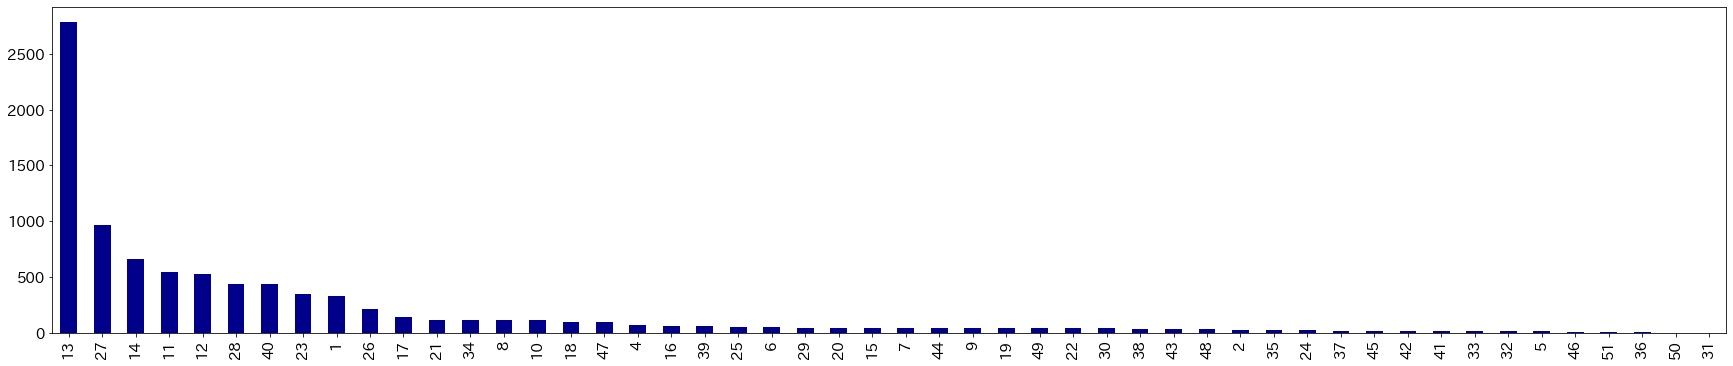

In [27]:
m_covid['都道府県コード'].value_counts().plot.bar(figsize=(30, 6), color='darkblue')
plt.show()

In [28]:
#コードではなく、都道府県名を知りたい
m_prefecture.head()

,都道府県コード,都道府県,緯度（世界測地系）,経度（世界測地系）,人口,面積,人口密度,病床数
0,1,北海道,43.06417,141.34694,"5,248,552","78,421",67,94
1,2,青森県,40.82444,140.74000,"1,246,138","9,646",129,29
2,3,岩手県,39.70361,141.15250,"1,226,430","15,275",80,38
3,4,宮城県,38.26889,140.87194,"2,303,160","7,282",316,29
4,5,秋田県,39.71861,140.10250,"965,968","11,638",83,32


In [29]:
#共通キーである都道府県コードでデータの結合を行う
m_covid_prefecture = pd.merge(m_covid, m_prefecture, on='都道府県コード')

- 結合のイメージ図

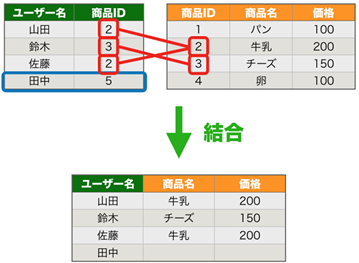

In [30]:
# 結合された結果を見てみる
m_covid_prefecture

# 結果の件数に着目する　8988件

,ID,厚労省コード,都道府県症例番号,発症日,確定日,公表日,全国地方公共団体コード,受診都道府県,管理市区町村,居住都道府県,...,Unnamed: 29,都道府県コード,都道府県症例番号.1,都道府県,緯度（世界測地系）,経度（世界測地系）,人口,面積,人口密度,病床数
0,1,NaN,1-1,2020/1/26,NaN,2020/1/28,NaN,神奈川県,NaN,NaN,...,NaN,1,1,北海道,43.06417,141.34694,"5,248,552","78,421",67,94
1,2,NaN,1-2,2020/1/31,2020/2/14,2020/2/14,NaN,北海道,NaN,北海道,...,NaN,1,2,北海道,43.06417,141.34694,"5,248,552","78,421",67,94
2,3,63,1-3,2020/2/8,2020/2/18,2020/2/19,NaN,北海道,NaN,北海道,...,NaN,1,3,北海道,43.06417,141.34694,"5,248,552","78,421",67,94
3,4,64,1-4,2020/2/3,2020/2/19,2020/2/19,NaN,北海道,NaN,北海道,...,NaN,1,4,北海道,43.06417,141.34694,"5,248,552","78,421",67,94
4,5,72,1-5,2020/2/15,2020/2/19,2020/2/20,NaN,北海道,NaN,北海道,...,NaN,1,5,北海道,43.06417,141.34694,"5,248,552","78,421",67,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8983,8980,NaN,47-91,NaN,NaN,NaN,NaN,沖縄県,NaN,NaN,...,NaN,47,91,沖縄県,26.21250,127.68111,"1,454,184","2,281",638,24
8984,8981,NaN,47-92,NaN,NaN,NaN,NaN,沖縄県,NaN,NaN,...,NaN,47,92,沖縄県,26.21250,127.68111,"1,454,184","2,281",638,24
8985,8982,NaN,47-93,NaN,NaN,NaN,NaN,沖縄県,NaN,NaN,...,NaN,47,93,沖縄県,26.21250,127.68111,"1,454,184","2,281",638,24
8986,8983,NaN,47-94,NaN,NaN,NaN,NaN,沖縄県,NaN,NaN,...,NaN,47,94,沖縄県,26.21250,127.68111,"1,454,184","2,281",638,24


In [31]:
# 前段で確認したときは、m_covidの件数は 9064件
# 結合した結果が 8988件 、76件減っている
# 本来のやりたいことから逸れるが調べてみよう

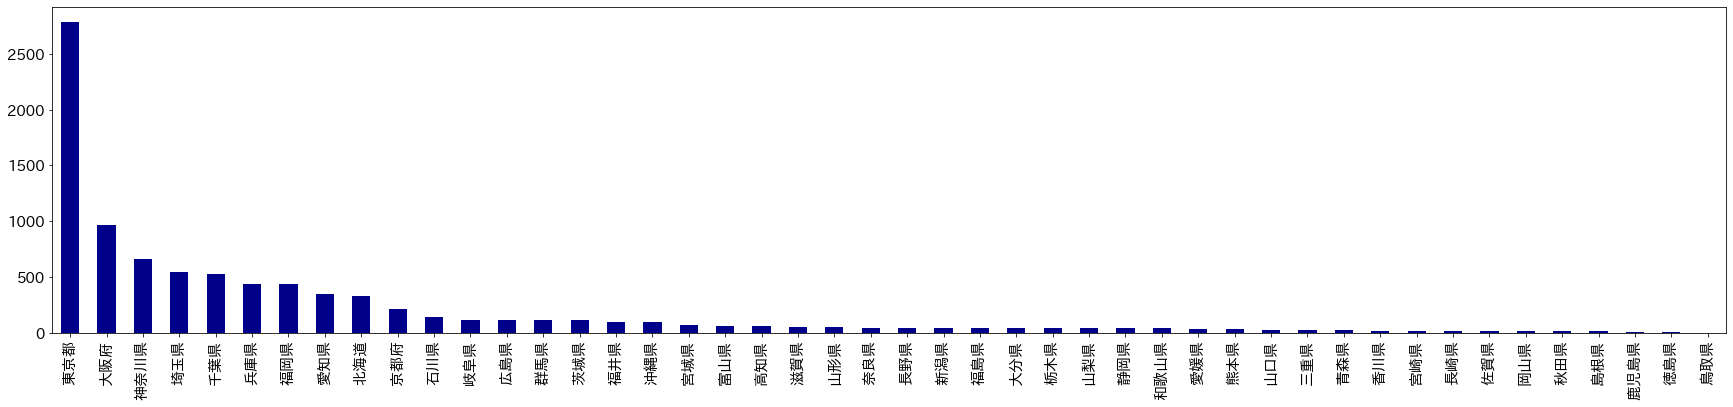

In [32]:
m_covid_prefecture["都道府県"].value_counts().plot.bar(figsize=(30, 6), color='darkblue')
plt.rcParams["font.family"] = "IPAexGothic"
plt.show()

### (optional) データが減った原因を調べる

In [33]:
# 仮説
# 紐づく都道府県コードがなかった

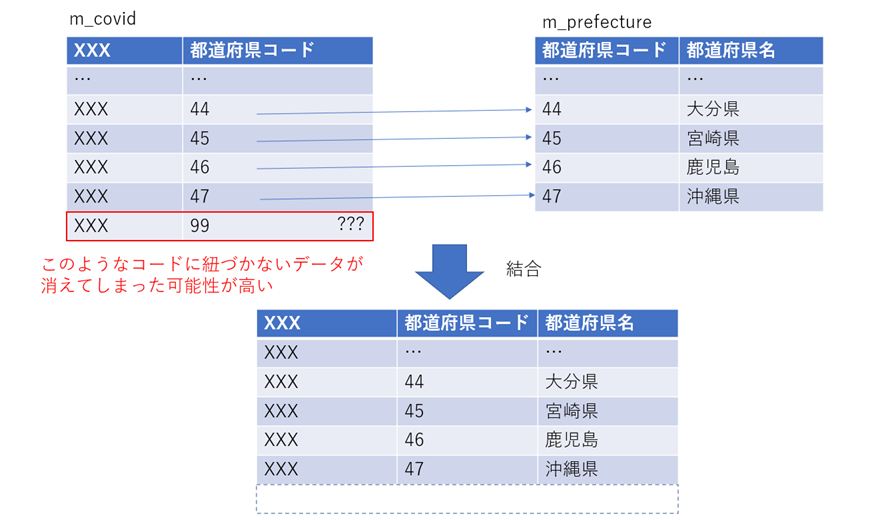

In [34]:
# m_covidで所有している都道府県コードを調べる（一意で出力）
m_covid["都道府県コード"].unique()

array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])

In [35]:
# m_covidで所有している都道府県コードを調べる（一意で出力）
m_prefecture["都道府県コード"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [36]:
# これを見る限り、48-51という紐づかない都道府県コードが入っているデータを発見できた
# ではこれはどんなデータなのか調べてみる
m_covid.where(m_covid['都道府県コード'].isin([48, 49, 50, 51])).dropna(subset=['都道府県コード'])

,ID,厚労省コード,都道府県症例番号,発症日,確定日,公表日,全国地方公共団体コード,受診都道府県,管理市区町村,居住都道府県,...,濃厚接触場所,海外渡航歴ﾌﾗｸﾞ,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,情報源1,情報源2,備考,Unnamed: 28,Unnamed: 29,都道府県コード,都道府県症例番号.1
8988,8985.0,空港検疫15,48-15,NaN,2020/03/20,NaN,NaN,成田空港,NaN,沖縄県,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10357.html;...,3/19スペイン(マドリード州)から帰国/成田空港検疫所/中部保健所管内在住,NaN,NaN,48.0,15.0
8989,8986.0,空港検疫19,48-19,NaN,2020/03/25,NaN,NaN,成田空港,NaN,奈良県,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10445.html,NaN,NaN,NaN,48.0,19.0
8990,8987.0,空港検疫21,48-21,NaN,2020/03/25,NaN,NaN,成田空港,NaN,東京都,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10445.html,NaN,NaN,NaN,48.0,21.0
8991,8988.0,空港検疫22,48-22,NaN,2020/03/25,NaN,NaN,成田空港,NaN,東京都,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10445.html,NaN,NaN,NaN,48.0,22.0
8992,8989.0,空港検疫24,48-24,NaN,2020/03/27,NaN,NaN,成田空港,NaN,千葉県,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10539.html,NaN,NaN,NaN,48.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9059,9056.0,NaN,50-1,NaN,NaN,NaN,NaN,中部国際空港,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,1.0
9060,9057.0,空港検疫27,51-27,NaN,2020/03/27,NaN,NaN,関西国際空港,NaN,不明,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10539.html,NaN,NaN,NaN,51.0,27.0
9061,9058.0,空港検疫28,51-28,NaN,2020/03/27,NaN,NaN,関西国際空港,NaN,兵庫県,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10539.html,NaN,NaN,NaN,51.0,28.0
9062,9059.0,空港検疫52,51-52,NaN,2020/03/30,NaN,NaN,関西国際空港,NaN,不明,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10638.html,3/29ドイツから帰国,NaN,NaN,51.0,52.0


In [37]:
#　受診都道府県が"空港名"となっており、不確定要素が高いための設定だと推測
#　判断としてはデータを補完しなくて良さそう

#### [optional] もっと効率的に落ちたデータを探す場合(1行で書ける)

In [38]:
# 興味ある人は自分で調べてみてください
m_covid[pd.merge(m_covid, m_prefecture, on='都道府県コード', how="outer")["都道府県"].isnull()]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,ID,厚労省コード,都道府県症例番号,発症日,確定日,公表日,全国地方公共団体コード,受診都道府県,管理市区町村,居住都道府県,...,濃厚接触場所,海外渡航歴ﾌﾗｸﾞ,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,情報源1,情報源2,備考,Unnamed: 28,Unnamed: 29,都道府県コード,都道府県症例番号.1
8988,8985,空港検疫15,48-15,NaN,2020/03/20,NaN,NaN,成田空港,NaN,沖縄県,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10357.html;...,3/19スペイン(マドリード州)から帰国/成田空港検疫所/中部保健所管内在住,NaN,NaN,48,15
8989,8986,空港検疫19,48-19,NaN,2020/03/25,NaN,NaN,成田空港,NaN,奈良県,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10445.html,NaN,NaN,NaN,48,19
8990,8987,空港検疫21,48-21,NaN,2020/03/25,NaN,NaN,成田空港,NaN,東京都,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10445.html,NaN,NaN,NaN,48,21
8991,8988,空港検疫22,48-22,NaN,2020/03/25,NaN,NaN,成田空港,NaN,東京都,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10445.html,NaN,NaN,NaN,48,22
8992,8989,空港検疫24,48-24,NaN,2020/03/27,NaN,NaN,成田空港,NaN,千葉県,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10539.html,NaN,NaN,NaN,48,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9059,9056,NaN,50-1,NaN,NaN,NaN,NaN,中部国際空港,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,1
9060,9057,空港検疫27,51-27,NaN,2020/03/27,NaN,NaN,関西国際空港,NaN,不明,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10539.html,NaN,NaN,NaN,51,27
9061,9058,空港検疫28,51-28,NaN,2020/03/27,NaN,NaN,関西国際空港,NaN,兵庫県,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10539.html,NaN,NaN,NaN,51,28
9062,9059,空港検疫52,51-52,NaN,2020/03/30,NaN,NaN,関西国際空港,NaN,不明,...,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_10638.html,3/29ドイツから帰国,NaN,NaN,51,52


### 症状のステータスから可視化を行う

In [39]:
#症状のステータスを見てみる
m_covid["ステータス"].unique()

array([nan, '死亡', '軽症', '中等症', '重症', '無症状'], dtype=object)

In [40]:
# 各ステータス別にデータを格納する
status_slight = m_covid[m_covid["ステータス"]=="軽症"] 
status_middle = m_covid[m_covid["ステータス"]=="中等症"]
status_serious = m_covid[m_covid["ステータス"]=="重症"]
status_death = m_covid[m_covid["ステータス"]=="死亡"]
status_none = m_covid[m_covid["ステータス"]=="無症状"].dropna(subset=['年代'])

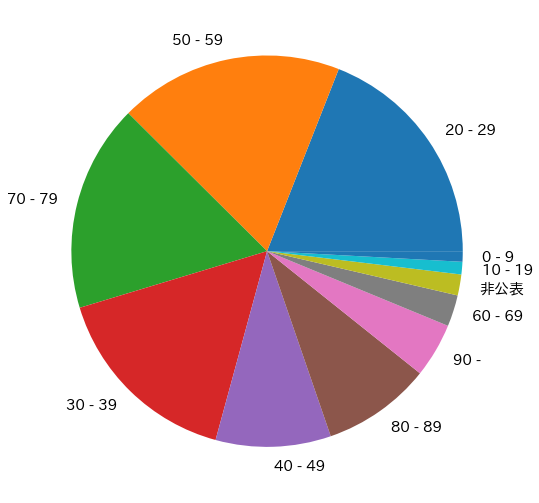

In [41]:
#軽症者の年齢割合を確認してみる
plt.rcParams['font.family'] = 'IPAPGothic'
plt.pie(status_slight["年代"].value_counts(), labels=status_slight["年代"].unique())
plt.show()

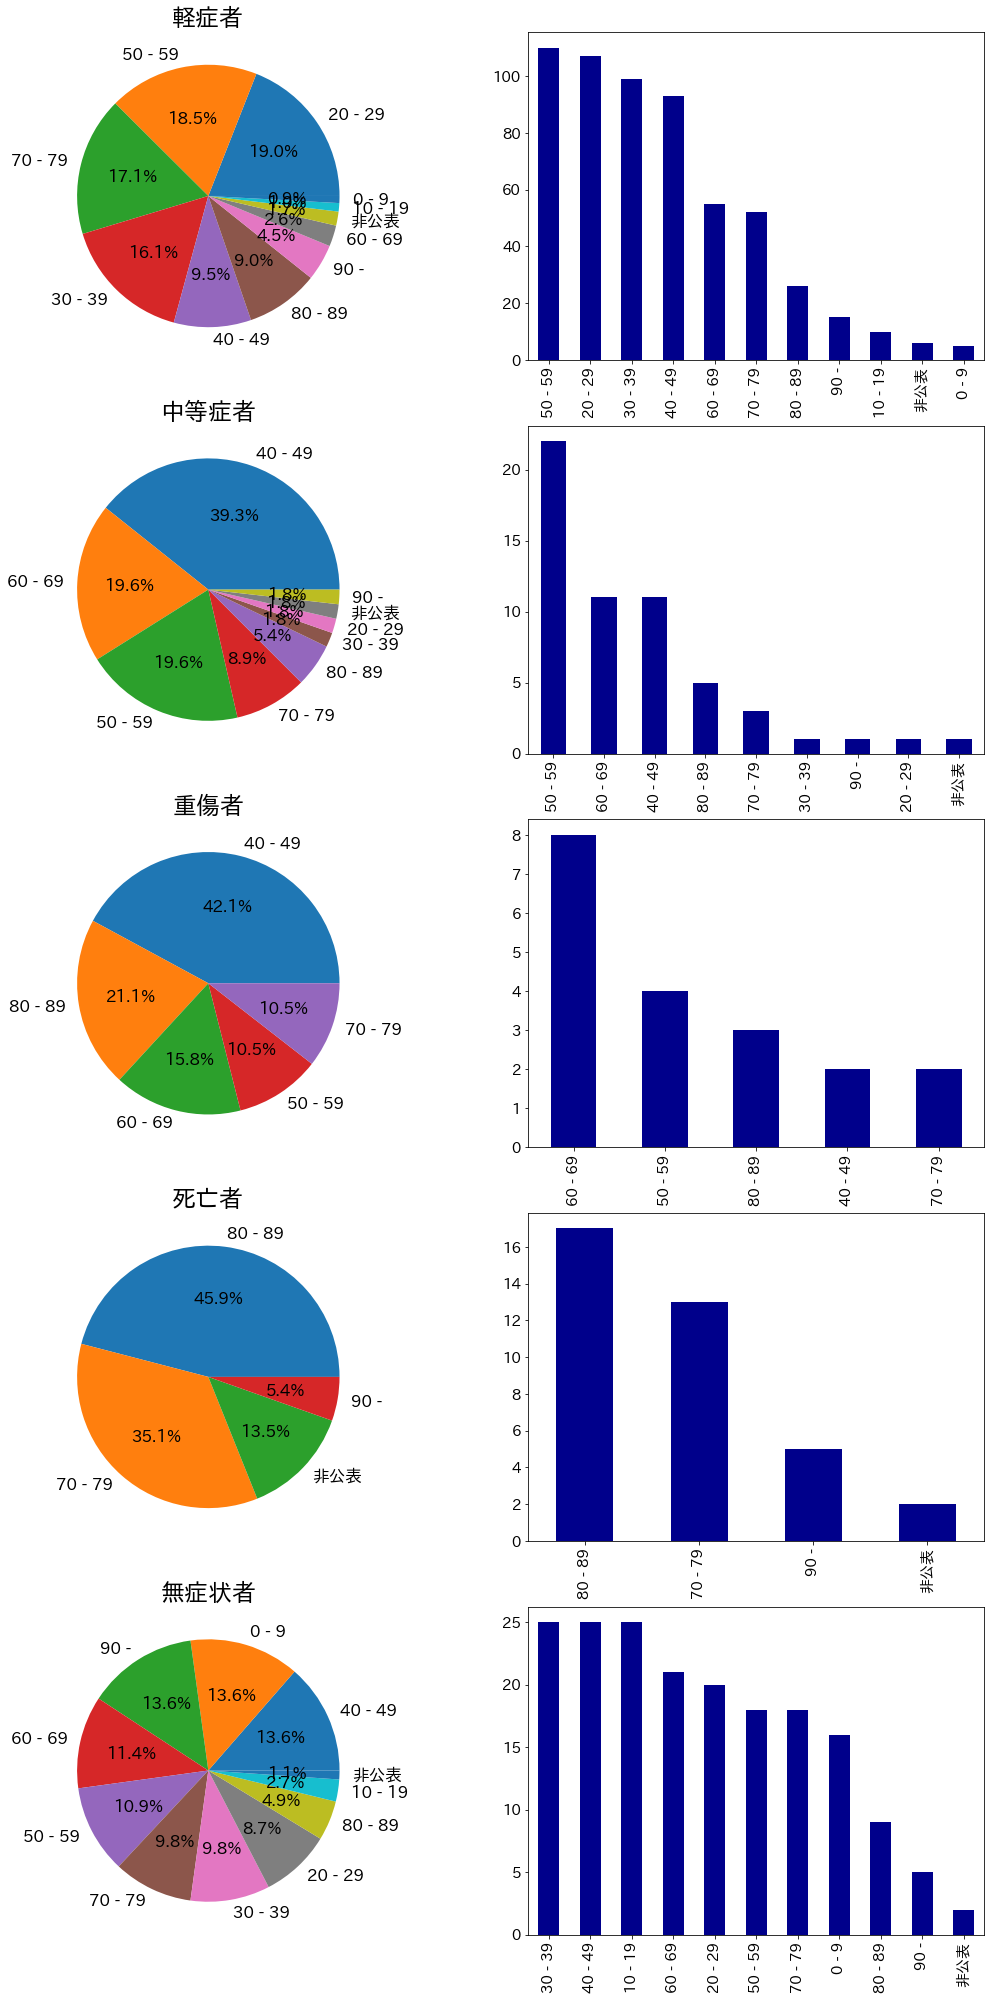

In [42]:
#軽症者の年齢割合を確認してみる
plt.rcParams['font.family'] = 'IPAPGothic'
fig = plt.figure(figsize=(18, 35))

#軽症者を描画
axs = fig.add_subplot(521)
plt.title('軽症者')
axs.pie(status_slight["年代"].value_counts(), labels=status_slight["年代"].unique(),autopct='%1.1f%%',textprops={'size': 'small'})
axs = fig.add_subplot(522)
axs = status_slight['年代'].value_counts().plot.bar(color='darkblue')

#中等症者を描画
axs = fig.add_subplot(523)
plt.title('中等症者')
axs.pie(status_middle["年代"].value_counts(), labels=status_middle["年代"].unique(),autopct='%1.1f%%',textprops={'size': 'small'})
axs = fig.add_subplot(524)
axs = status_middle['年代'].value_counts().plot.bar( color='darkblue')

#重傷者を描画
axs = fig.add_subplot(525)
plt.title('重傷者')
axs.pie(status_serious["年代"].value_counts(), labels=status_serious["年代"].unique(),autopct='%1.1f%%',textprops={'size': 'small'})
axs = fig.add_subplot(526)
axs = status_serious['年代'].value_counts().plot.bar( color='darkblue')

#重傷者を描画
axs = fig.add_subplot(527)
plt.title('死亡者')
axs.pie(status_death["年代"].value_counts(), labels=status_death["年代"].unique(),autopct='%1.1f%%',textprops={'size': 'small'})
axs = fig.add_subplot(528)
axs = status_death['年代'].value_counts().plot.bar( color='darkblue')

#重傷者を描画
axs = fig.add_subplot(529)
plt.title('無症状者')
axs.pie(status_none["年代"].value_counts(), labels=status_none["年代"].unique(),autopct='%1.1f%%',textprops={'size': 'small'})
axs = fig.add_subplot(5,2,10)
axs = status_none['年代'].value_counts().plot.bar( color='darkblue')
plt.show()

### 発症場所のマッピングを実施する

In [43]:
#　居住地区の表示 (sampleの10件表示)
m_covid["居住市区町村"].unique()[0:9]

array([nan, '札幌市', '七飯町', '中富良野町', '千歳市', '胆振総合振興局管内', '知内町', '旭川市',
       '渡島総合振興局管内(函館市)'], dtype=object)

In [44]:
# values_countで数えてみる (あれっ東京少なくないか...)
m_covid["居住市区町村"].value_counts()

大阪市         444
都内          323
東京都         235
福岡市         218
名古屋市        195
           ... 
神川町           1
三次市           1
八街市           1
富谷市           1
ジンバブエ共和国      1
Name: 居住市区町村, Length: 582, dtype: int64

In [45]:
# (Optional) groupby & sizeで数えることも可能
m_covid.groupby("居住市区町村").size()

居住市区町村
あま市          2
あわら市         1
いすみ市         1
いわき市         1
いわき市保健所管内    1
            ..
鶴岡市          5
鹿児島市         1
鹿沼市          1
鹿鳴市          1
龍ケ崎市         5
Length: 582, dtype: int64

In [46]:
# 欠損値 (NaN)を数えてみる
m_covid["居住市区町村"].isnull().sum()

3369

In [47]:
# 欠損値も多く、これは困ったのでもう一度データを見ると、「受診都道府県」の項目は欠損が少ないので、県名で補完する
m_covid["受診都道府県"].unique()

array(['神奈川県', '北海道', '青森県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県',
       nan, '群馬県', '埼玉県', '千葉県', '東京都', '新潟県', '富山県', '石川県', '福井県', '山梨県',
       '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府', '兵庫県',
       '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県', '香川県',
       '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', '鹿児島県',
       '沖縄県', '成田空港', '羽田空港', '中部国際空港', '関西国際空港'], dtype=object)

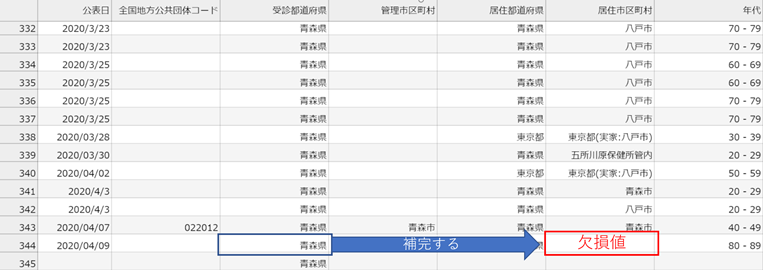

In [48]:
# fillna構文を使ってnanの置き換えと、ついでに「都内」を「東京都」に置き換え
only_place_data = m_covid["居住市区町村"].fillna(m_covid["受診都道府県"]).replace("都内", "東京都")
only_place_data.value_counts()

東京都      2683
大阪市       444
福岡市       218
名古屋市      195
横浜市       177
         ... 
安城市         1
河南町         1
八雲町         1
玄海町         1
大和郡山市       1
Name: 居住市区町村, Length: 615, dtype: int64

In [49]:
# 前段でやったこと同じようにデータを結合してみる
m_covid_land = pd.merge(only_place_data, m_land, left_on='居住市区町村', right_on="居住地")

In [50]:
#発症の場所と座標が紐づいた形でとれた！
m_covid_land[0:19]

,居住市区町村,居住地,緯度（世界測地系）,経度（世界測地系）,情報源
0,神奈川県,神奈川県,35.448022,139.642605,https://www.google.com/maps/place/%E7%A5%9E%E5...
1,神奈川県,神奈川県,35.448022,139.642605,https://www.google.com/maps/place/%E7%A5%9E%E5...
2,神奈川県,神奈川県,35.448022,139.642605,https://www.google.com/maps/place/%E7%A5%9E%E5...
3,神奈川県,神奈川県,35.448022,139.642605,https://www.google.com/maps/place/%E7%A5%9E%E5...
4,神奈川県,神奈川県,35.448022,139.642605,https://www.google.com/maps/place/%E7%A5%9E%E5...
5,神奈川県,神奈川県,35.448022,139.642605,https://www.google.com/maps/place/%E7%A5%9E%E5...
6,神奈川県,神奈川県,35.448022,139.642605,https://www.google.com/maps/place/%E7%A5%9E%E5...
7,神奈川県,神奈川県,35.448022,139.642605,https://www.google.com/maps/place/%E7%A5%9E%E5...
8,神奈川県,神奈川県,35.448022,139.642605,https://www.google.com/maps/place/%E7%A5%9E%E5...
9,神奈川県,神奈川県,35.448022,139.642605,https://www.google.com/maps/place/%E7%A5%9E%E5...


In [51]:
# group毎の件数に置き換える
m_covid_land_size = m_covid_land.groupby(["居住地","緯度（世界測地系）","経度（世界測地系）"]).size()
m_covid_land_size

居住地      緯度（世界測地系）  経度（世界測地系） 
いすみ市     35.254075  140.385234     1
いわき市     37.050552  140.888008     1
さいたま市    35.862008  139.645849    64
つくばみらい市  35.963461  140.038424     4
つくば市     36.083659  140.076911    21
                                  ..
高松市      34.342820  134.044277     1
高槻市      34.846158  135.617384    19
高知市      33.558763  133.531315    40
高石市      34.520730  135.440279     1
龍ケ崎市     35.911725  140.182753     5
Length: 278, dtype: int64

In [52]:
# foliumのインストール
!pip install folium

     |████████████████████████████████| 93 kB 1.0 MB/s eta 0:00:01


In [53]:
# 実際に図示してみる
import folium

covid_map = folium.Map(location=[37.362222, 138.731388], zoom_start=6)

# 取得できた人数によって、円の大きさをIF文によって条件分岐させる
for i, r in m_covid_land_size.iteritems():
    if r > 0 and r < 10:
        radius_size = 4
    elif r >= 10 and r < 50:
        radius_size = 8
    elif r >= 50 and r < 100:
        radius_size = 16
    elif r >= 100 and r < 300:
        radius_size = 32
    elif r >= 300 and r < 500:
        radius_size = 64
    elif r >= 300 and r < 500:
        radius_size = 128
    elif r >= 500 and r < 1000:
        radius_size = 256
    elif r >= 1000:
        radius_size = 128
                
    folium.CircleMarker(location=[i[1], i[2]], radius=radius_size).add_to(covid_map)

covid_map

#### その他データを使って、可視化への取り組みをしてみよう！